In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from pylab import *

In [17]:
#setup variables

q1 = 1; q2 = -1
r1 = 1e-2*array([-5,0])
r2 = 1e-2*array([5,0])

x = linspace(-0.5,0.5,100)
y = linspace(-0.5,0.5,100)

In [42]:
#define functions

def Pot(x,y,q,r):
    eps_0 = 8.854187817e-12
    fac = 1./(4*pi*eps_0)
    X,Y = meshgrid(x,y)
    rr = sqrt(abs(X-r[0])**2 + abs(Y-r[1])**2)
    return fac * q/rr

def Field(x,y,q,r):
    X,Y = meshgrid(x,y)
    Ex = -gradient(Pot(x,y,q,r),x,axis=1)
    Ey = -gradient(Pot(x,y,q,r),y,axis=0)
    return Ex, Ey

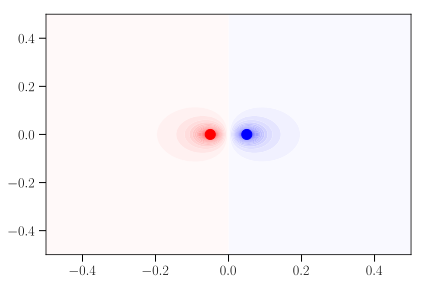

In [50]:
# Show potential
contourf(x,y,Pot(x,y,q1,r1) + Pot(x,y,q2,r2),100,cmap='seismic')
plot(r1[0],r1[1],'ro',markersize=10)
plot(r2[0],r2[1],'bo',markersize=10)
savefig('pot.pdf')
show()

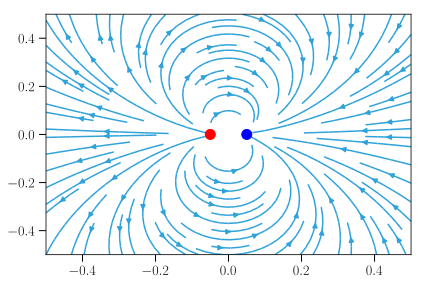

In [52]:
# Show electric field

Ex1, Ey1 = Field(x,y,q1,r1)
Ex2, Ey2 = Field(x,y,q2,r2)

Ex = Ex1 + Ex2; Ey = Ey1 + Ey2

E = sqrt(Ex**2 + Ey**2)

streamplot(x,y,Ex,Ey)
plot(r1[0],r1[1],'ro',markersize=10)
plot(r2[0],r2[1],'bo',markersize=10)
savefig('Field.pdf')
show()